In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np


amazon


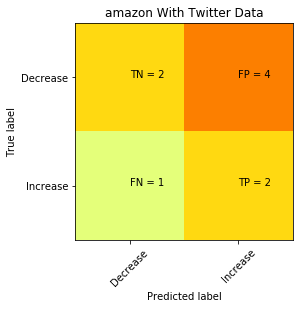

Model Score:  0.95
Accuracy:  0.4444444444444444
19    0
8     0
26    0
3     0
2     1
7     1
22    0
9     0
17    1
Name: change, dtype: int64
[1 1 1 0 0 1 1 0 1]
          importance
low         0.208309
open        0.202592
high        0.148342
volume      0.133968
Positive    0.122952
close       0.093055
Negative    0.047700
Total       0.043081


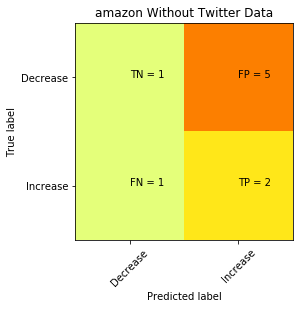

Model Score:  0.95
Accuracy:  0.3333333333333333
19    0
8     0
26    0
3     0
2     1
7     1
22    0
9     0
17    1
Name: change, dtype: int64
[1 1 1 0 0 1 1 1 1]
        importance
close     0.404265
volume    0.238050
high      0.154459
low       0.113237
open      0.089989

apple


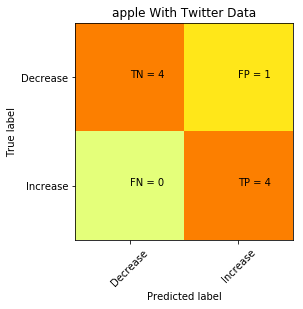

Model Score:  1.0
Accuracy:  0.8888888888888888
19    0
8     0
26    0
3     1
2     1
7     1
22    0
9     0
17    1
Name: change, dtype: int64
[1 0 0 1 1 1 0 0 1]
          importance
Positive    0.347972
close       0.215757
low         0.192445
high        0.095767
Negative    0.094649
Total       0.040241
open        0.013170
volume      0.000000


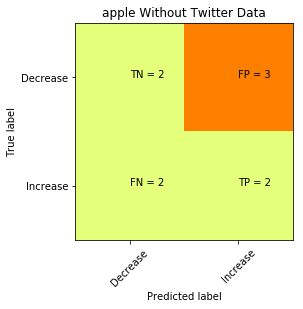

Model Score:  0.9
Accuracy:  0.4444444444444444
19    0
8     0
26    0
3     1
2     1
7     1
22    0
9     0
17    1
Name: change, dtype: int64
[1 1 0 1 1 0 1 0 0]
        importance
close     0.293096
high      0.265042
volume    0.188105
open      0.151642
low       0.102115

facebook


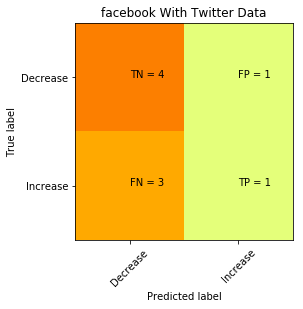

Model Score:  0.95
Accuracy:  0.5555555555555556
19    0
8     0
26    1
3     0
2     1
7     1
22    0
9     0
17    1
Name: change, dtype: int64
[0 0 1 0 0 0 1 0 0]
          importance
low         0.258278
volume      0.186505
close       0.144752
Total       0.136145
Positive    0.134540
open        0.091988
Negative    0.047791
high        0.000000


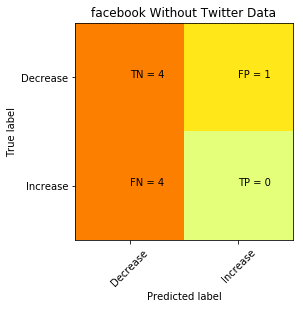

Model Score:  0.95
Accuracy:  0.4444444444444444
19    0
8     0
26    1
3     0
2     1
7     1
22    0
9     0
17    1
Name: change, dtype: int64
[0 0 0 0 0 0 1 0 0]
        importance
close     0.334001
volume    0.254914
open      0.187234
low       0.129296
high      0.094555

google


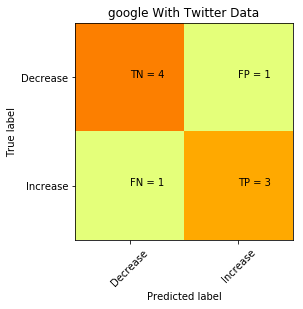

Model Score:  0.95
Accuracy:  0.7777777777777778
19    0
8     0
26    1
3     1
2     1
7     0
22    0
9     0
17    1
Name: change, dtype: int64
[0 0 1 0 1 0 1 0 1]
          importance
Positive    0.301258
low         0.186623
Total       0.166702
Negative    0.140645
close       0.107420
open        0.072890
volume      0.024462
high        0.000000


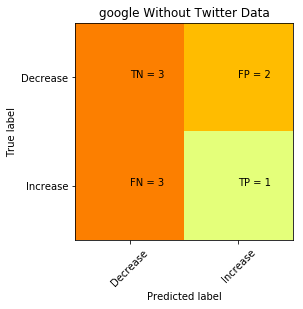

Model Score:  0.95
Accuracy:  0.4444444444444444
19    0
8     0
26    1
3     1
2     1
7     0
22    0
9     0
17    1
Name: change, dtype: int64
[0 0 0 0 1 0 1 1 0]
        importance
volume    0.394881
close     0.307851
high      0.166638
open      0.078367
low       0.052264

netflix


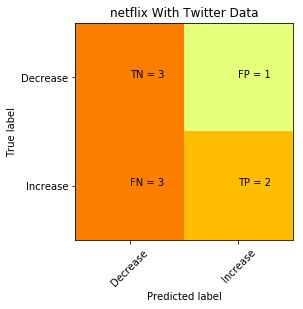

Model Score:  1.0
Accuracy:  0.5555555555555556
19    0
8     0
26    1
3     0
2     1
7     1
22    0
9     1
17    1
Name: change, dtype: int64
[0 0 1 0 1 0 1 0 0]
          importance
low         0.371145
close       0.217327
Positive    0.126255
volume      0.106247
open        0.095234
Total       0.057029
Negative    0.026765
high        0.000000


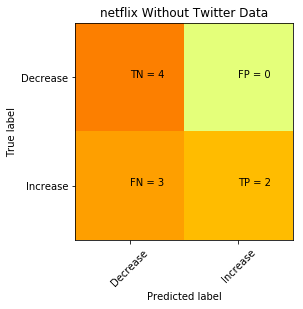

Model Score:  1.0
Accuracy:  0.6666666666666666
19    0
8     0
26    1
3     0
2     1
7     1
22    0
9     1
17    1
Name: change, dtype: int64
[0 0 1 0 1 0 0 0 0]
        importance
volume    0.274874
close     0.267175
high      0.162505
low       0.153450
open      0.141997


In [2]:
stocks = ["amazon","apple","facebook","google","netflix"]

for stock in stocks:
    Stock_Prediction = pd.read_csv('faangStockTweets\\' + stock + '.csv')
    Stock_Prediction = pd.DataFrame(Stock_Prediction).head(29)
    print()
    print(stock)

    ##############################WITH TWITTER DATA##############################################

    X = Stock_Prediction.drop(['Stock_Date','Tweet_Date','change'],axis=1)
    y = Stock_Prediction['change']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)



    model = RandomForestClassifier(n_estimators = 4, criterion = 'entropy', random_state = 48)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Decrease','Increase']
    plt.title(stock + ' With Twitter Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

    print("Model Score: ", model.score(X_train,y_train))
    print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
    print(y_test)
    print(y_pred)
    
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

    #############################WITHOUT TWITTER DATA########################################

    X = Stock_Prediction.drop(['Stock_Date','Tweet_Date','change','Positive',
                              'Negative','Total'],axis=1)
    y = Stock_Prediction['change']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

    model = RandomForestClassifier(n_estimators = 4, criterion = 'entropy', random_state = 48)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Decrease','Increase']
    plt.title(stock + ' Without Twitter Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

    print("Model Score: ", model.score(X_train,y_train))
    print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
    print(y_test)
    print(y_pred)
    
    feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)
